# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [6]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train['CNT_CHILDREN'].describe()

Path of read in data: ./data/application_train.csv


count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 boxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [8]:
#1
cut_rule = [0, 1, 3, 6, 20]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-0.001, 1.0]    276490
(1.0, 3.0]        30466
(3.0, 6.0]          534
(6.0, 20.0]          21
Name: CNT_CHILDREN_GROUP, dtype: int64

In [43]:
#2-1
grouped_df = app_train.groupby(by = 'CNT_CHILDREN_GROUP')
grouped_df['AMT_INCOME_TOTAL'].mean()

CNT_CHILDREN_GROUP
(-0.001, 1.0]    168361.253573
(1.0, 3.0]       172747.592085
(3.0, 6.0]       170224.382022
(6.0, 20.0]      151714.285714
Name: AMT_INCOME_TOTAL, dtype: float64

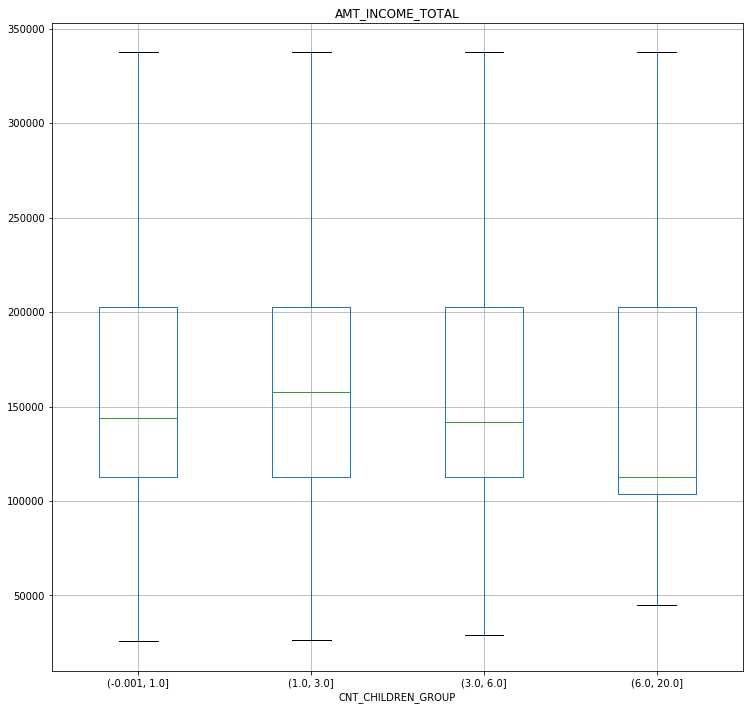

In [44]:
#2-2
plt_column = ['AMT_INCOME_TOTAL']
plt_by = 'CNT_CHILDREN_GROUP'

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [ ]:
#3
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df['AMT_INCOME_TOTAL'].apply(lambda x: (x-grouped_df.mean()/grouped_df.std()))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()